Setup

In [415]:
import pandas as pd

df=pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [416]:
print(df.shape)
df.info()
df.describe()

(6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Handling Missing Values

In [417]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [418]:
MissingV_Cols=["Teacher_Quality","Parental_Education_Level","Distance_from_Home"]
for col in MissingV_Cols:
    df[col]=df[col].fillna(df[col].mode()[0])

df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Feature Engineering

In [419]:
cat_cols=df.select_dtypes(include=object)
cat_cols.nunique()
unique_values= {f"{col} has " : df[col].unique() for col in cat_cols}
unique_values

{'Parental_Involvement has ': array(['Low', 'Medium', 'High'], dtype=object),
 'Access_to_Resources has ': array(['High', 'Medium', 'Low'], dtype=object),
 'Extracurricular_Activities has ': array(['No', 'Yes'], dtype=object),
 'Motivation_Level has ': array(['Low', 'Medium', 'High'], dtype=object),
 'Internet_Access has ': array(['Yes', 'No'], dtype=object),
 'Family_Income has ': array(['Low', 'Medium', 'High'], dtype=object),
 'Teacher_Quality has ': array(['Medium', 'High', 'Low'], dtype=object),
 'School_Type has ': array(['Public', 'Private'], dtype=object),
 'Peer_Influence has ': array(['Positive', 'Negative', 'Neutral'], dtype=object),
 'Learning_Disabilities has ': array(['No', 'Yes'], dtype=object),
 'Parental_Education_Level has ': array(['High School', 'College', 'Postgraduate'], dtype=object),
 'Distance_from_Home has ': array(['Near', 'Moderate', 'Far'], dtype=object),
 'Gender has ': array(['Male', 'Female'], dtype=object)}

Ordinal Encoding for {`Parental_Involvement` , `Access_to_Resources` , `Motivation_Level` , `Family_Income` , `Teacher_Quality` , `Distance_from_Home`}

Binary Encoding for {`Extracurricular_Activities` , `Internet_Access` , `School_Type` , `Learning_Disabilities` , `Gender`}

One-Hot Encoding for {`Peer_Influence`, `Parental_Education_Level`}

In [420]:
def encode_student_data(df):
    # 1. Ordinal Encoding
    ordinal_mappings = {
        "Parental_Involvement": {"Low": 1, "Medium": 2, "High": 3},
        "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
        "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
        "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
        "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
        "Distance_from_Home": {"Near": 1, "Moderate": 2, "Far": 3},
    }
    for col, mapping in ordinal_mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # 2. Binary Encoding
    binary_mappings = {
            "Extracurricular_Activities": {"No": 0, "Yes": 1},
            "Internet_Access": {"No": 0, "Yes": 1},
            "School_Type": {"Public": 0, "Private": 1},
            "Learning_Disabilities": {"No": 0, "Yes": 1},
            "Gender": {"Male": 0, "Female": 1},
    }
    for col, mapping in binary_mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # 3. One-Hot Encoding
    one_hot_cols = ["Peer_Influence", "Parental_Education_Level"]
    df = pd.get_dummies(df, columns=[col for col in one_hot_cols if col in df.columns], drop_first=False)

    return df

df_encoded = encode_student_data(df.copy())
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,23,84,1,3,0,7,73,1,1,0,...,0,1,0,67,False,False,True,False,True,False
1,19,64,1,2,0,8,59,1,1,2,...,0,2,1,61,True,False,False,True,False,False
2,24,98,2,2,1,7,91,2,1,2,...,0,1,0,74,False,True,False,False,False,True
3,29,89,1,2,1,8,98,2,1,1,...,0,2,0,71,True,False,False,False,True,False
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,70,False,True,False,True,False,False


In [421]:
df_encoded.info()
df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Parental_Involvement                   6607 non-null   int64
 3   Access_to_Resources                    6607 non-null   int64
 4   Extracurricular_Activities             6607 non-null   int64
 5   Sleep_Hours                            6607 non-null   int64
 6   Previous_Scores                        6607 non-null   int64
 7   Motivation_Level                       6607 non-null   int64
 8   Internet_Access                        6607 non-null   int64
 9   Tutoring_Sessions                      6607 non-null   int64
 10  Family_Income                          6607 non-null   int64
 11  Teacher_Quality               

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,2.195247,0.304071,2.967610,0.105191,1.501589,0.422733,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.596707,0.460048,1.031231,0.306823,0.670260,0.494031,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,4.000000,0.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,6.000000,1.000000,3.000000,1.000000,101.000000


Data Visualization

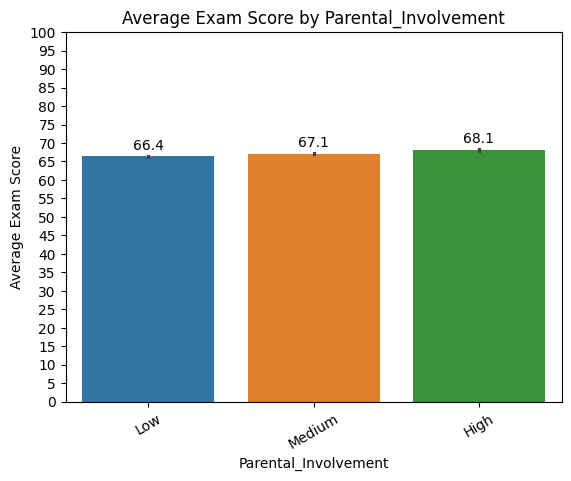

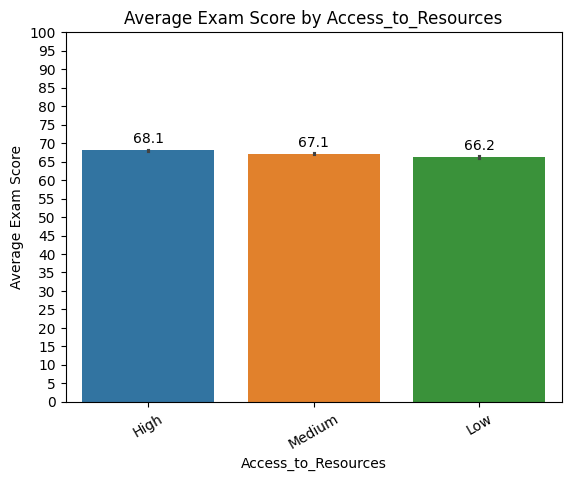

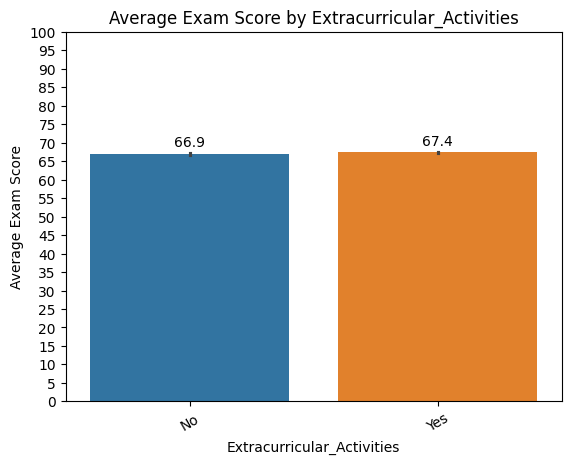

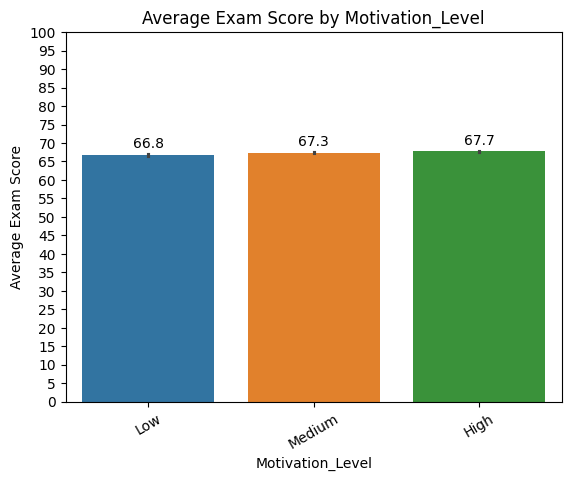

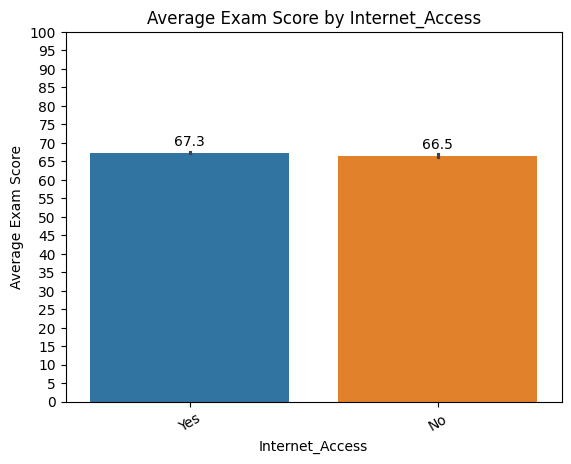

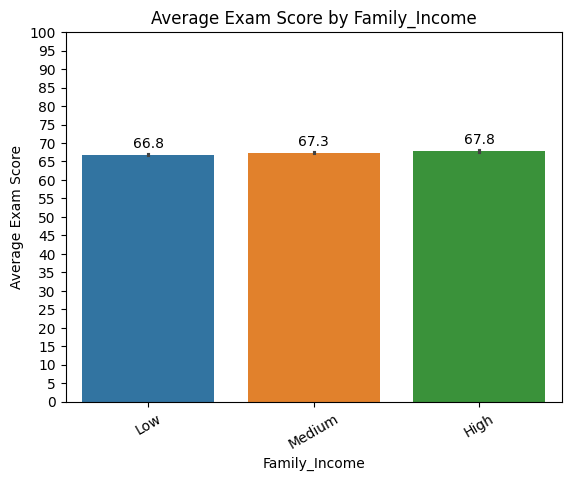

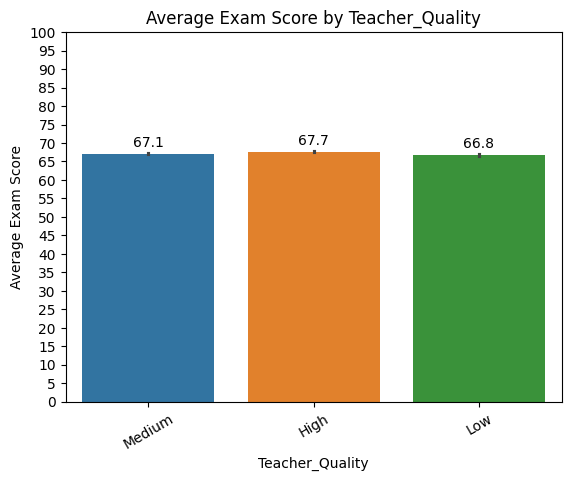

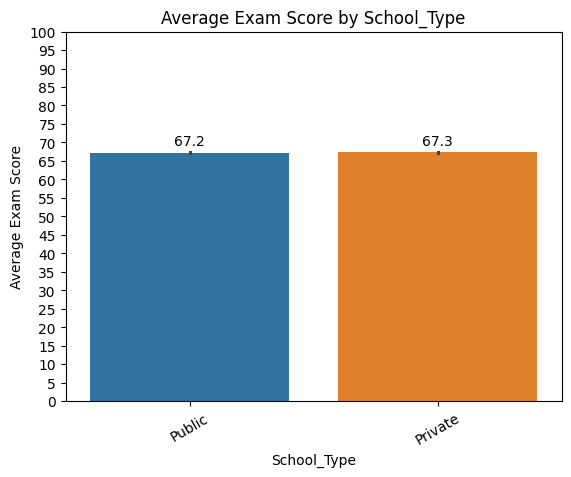

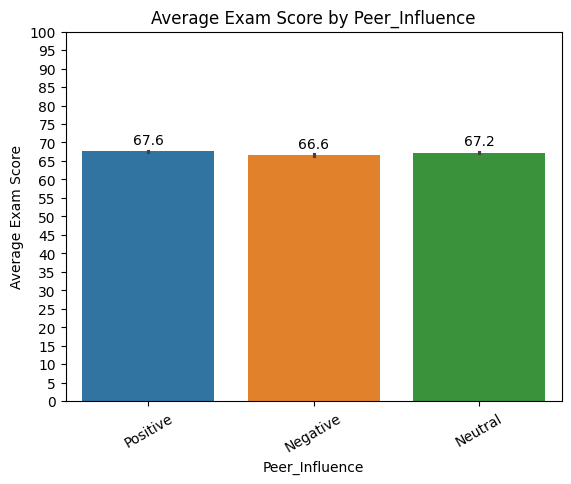

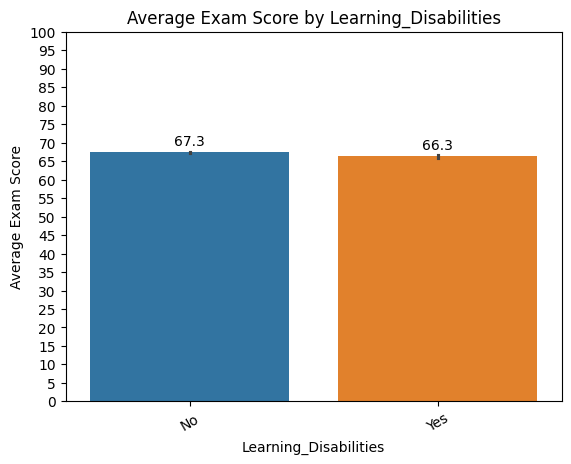

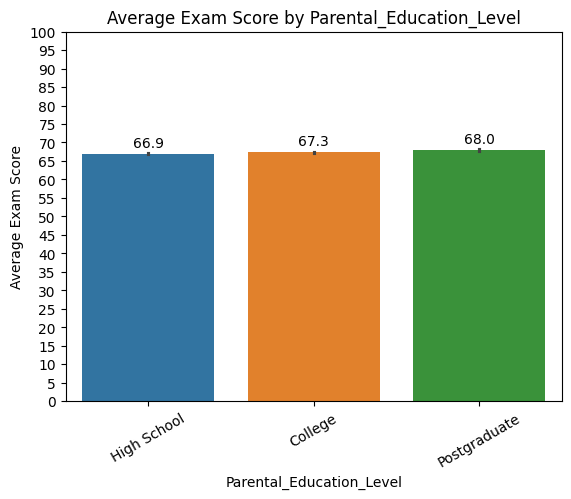

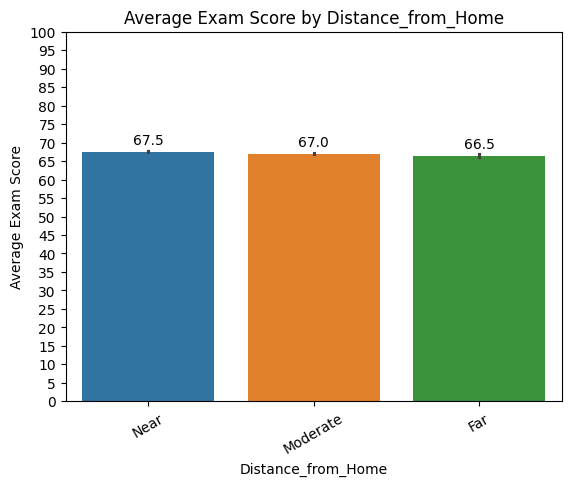

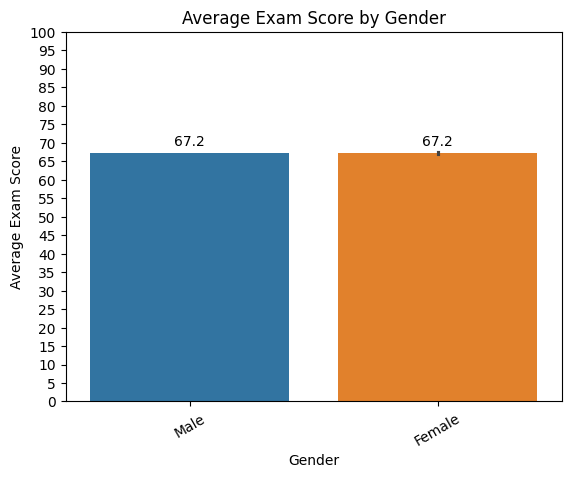

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in cat_cols:
    ax=sns.barplot(x=col,y="Exam_Score",data=df,estimator=np.mean,hue=col,legend=False)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)
    
    ax.set_ylim(0,70)
    ax.set_yticks(range(0,101,5))

    plt.title(f"Average Exam Score by {col}")
    plt.ylabel("Average Exam Score")
    plt.xticks(rotation=30)

    plt.show()



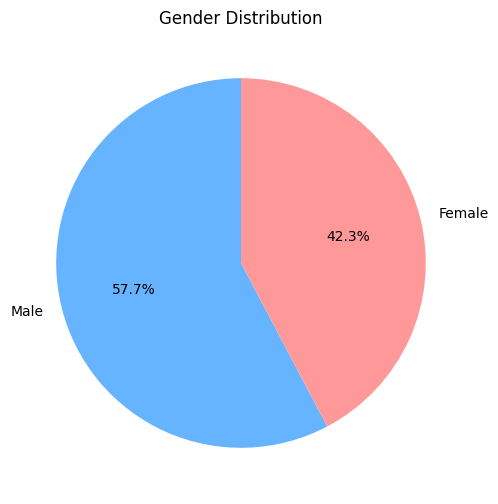

In [423]:
counts = df["Gender"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999"])
plt.title("Gender Distribution")
plt.show()


Check Correlations

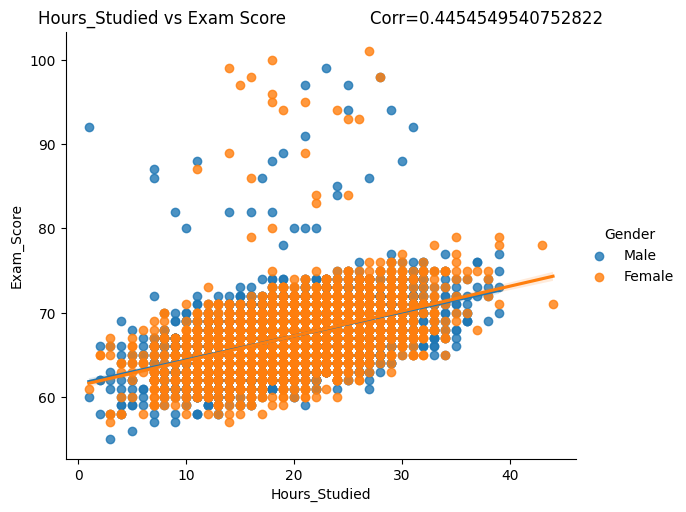

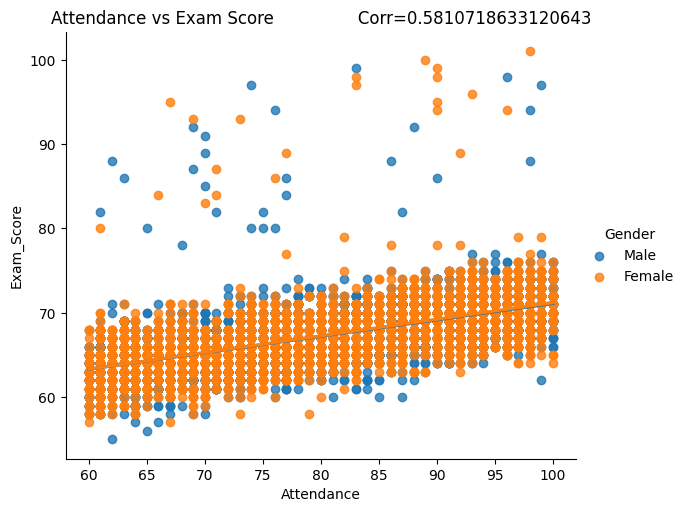

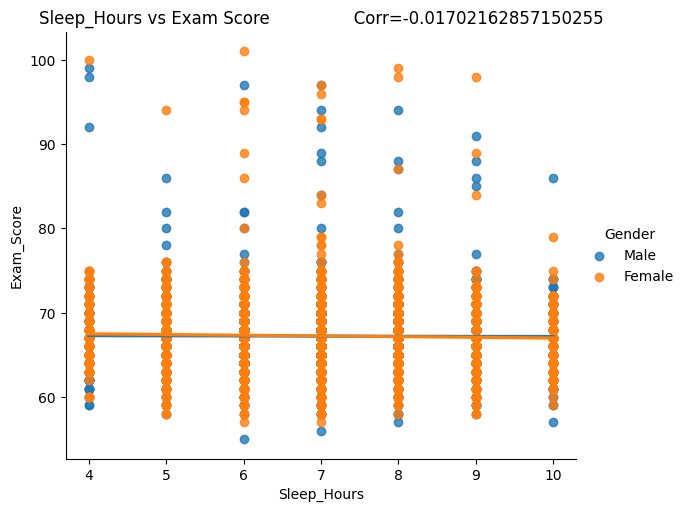

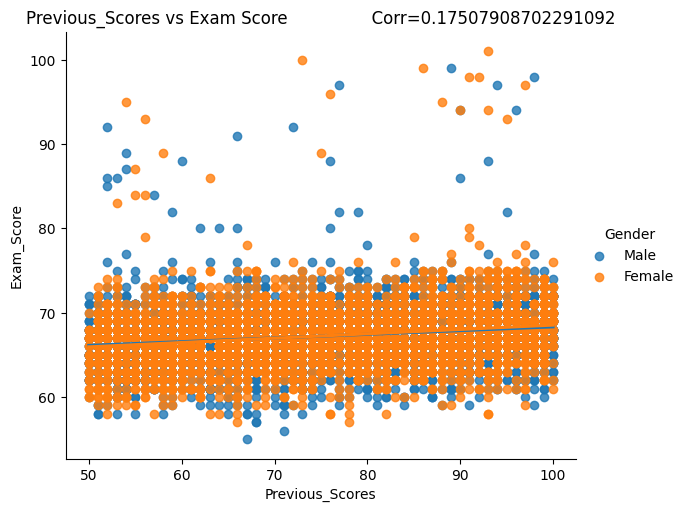

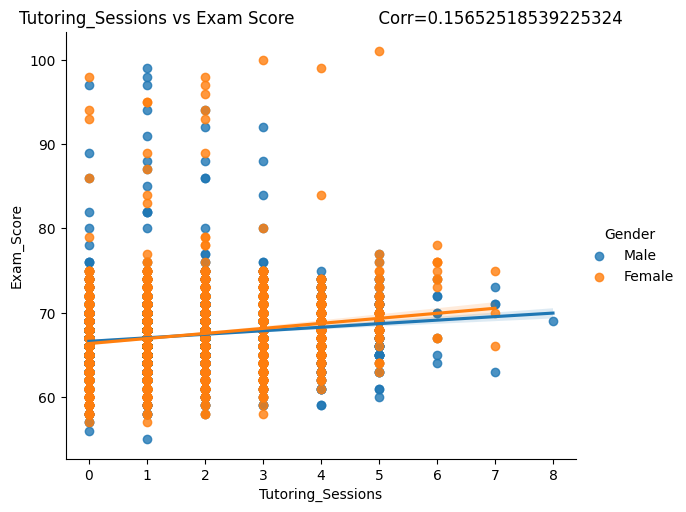

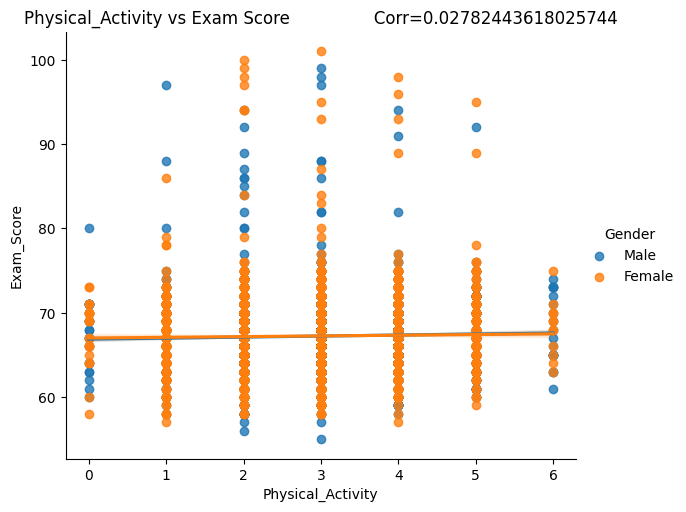

In [424]:
for col in df:
    if col not in cat_cols and col!="Exam_Score":
        sns.lmplot(x=col,y="Exam_Score",data=df,hue="Gender",aspect=1.2)
        corr=df[col].corr(df["Exam_Score"])
        plt.title(f"{col} vs Exam Score                Corr={corr}")
        plt.show()

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

X=df_encoded.drop(columns="Exam_Score")
y=df_encoded["Exam_Score"]
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(train_X,train_y)
y_pred=model.predict(test_X)
print(f"MAE --> {mean_absolute_error(test_y,y_pred)}")
print(f"MSE --> {mean_squared_error(test_y,y_pred)}")
print(f"R^2 Score --> {r2_score(test_y,y_pred)}")

MAE --> 0.44516238324352
MSE --> 3.241646591735321
R^2 Score --> 0.7706664328807272


Lets Try Polynomial regression

In [426]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False)

train_X_Poly=poly.fit_transform(train_X)
test_X_poly=poly.transform(test_X)
Poly_Model=LinearRegression()
Poly_Model.fit(train_X_Poly,train_y)
y_pred2=Poly_Model.predict(test_X_poly)


mae = mean_absolute_error(test_y,y_pred2)
r2 = r2_score(test_y, y_pred2)

print(f"MAE --> {mae}")
print(f"R^2 Score --> {r2}")


MAE --> 0.5737236300851033
R^2 Score --> 0.7555670945162076
